In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math
from sklearn.preprocessing import MinMaxScaler

The following dataset contains historical stock prices of Edwards Lifesciences Corporation(EW):

In [3]:
df = pd.read_csv("EW-MAX.csv")

In [4]:
#Setting date as index
df.index= df['Date']

#Convert date to datetime format
df['Date']=pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,,
2000/3/27,2000-03-27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
2000/3/28,2000-03-28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2000/3/29,2000-03-29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
2000/3/30,2000-03-30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
2000/3/31,2000-03-31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600
...,...,...,...,...,...,...,...
2017/9/1,2017-09-01,113.790001,114.099998,112.790001,113.309998,113.309998,950000
2017/9/5,2017-09-05,112.519997,113.529999,111.160004,111.870003,111.870003,1805200
2017/9/6,2017-09-06,112.029999,112.489998,110.250000,112.230003,112.230003,2136700


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4392 entries, 2000/3/27 to 2017/9/8
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4392 non-null   datetime64[ns]
 1   Open       4392 non-null   float64       
 2   High       4392 non-null   float64       
 3   Low        4392 non-null   float64       
 4   Close      4392 non-null   float64       
 5   Adj_Close  4392 non-null   float64       
 6   Volume     4392 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 274.5+ KB


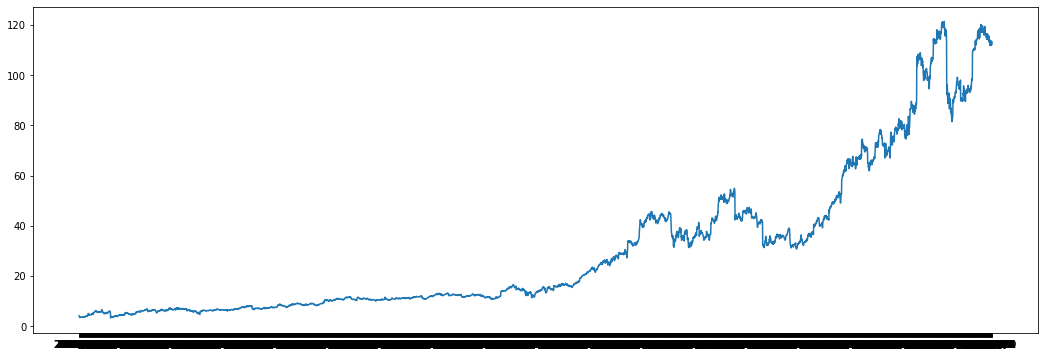

In [6]:
plt.figure(figsize=(18,6))
plt.plot(df['Close'])


In [7]:
data= df[['Close']]
data

,Close
Date,
2000/3/27,4.125000
2000/3/28,4.015625
2000/3/29,4.000000
2000/3/30,3.843750
2000/3/31,3.390625
...,...
2017/9/1,113.309998
2017/9/5,111.870003
2017/9/6,112.230003


In [8]:
#Coverting to numpy array
cdata= data.values
cdata

array([[  4.125   ],
       [  4.015625],
       [  4.      ],
       ...,
       [112.230003],
       [112.339996],
       [113.190002]])

In [9]:
#Getting size of training set
training_len=math.ceil(len(cdata)* 0.75)
training_len

3294

In [10]:
#Feature scaling using normalization
scaling = MinMaxScaler(feature_range=(0,1))
scaled_data=scaling.fit_transform(cdata)
scaled_data

array([[0.00740835],
       [0.0064823 ],
       [0.00635001],
       ...,
       [0.9226992 ],
       [0.92363047],
       [0.9308272 ]])

In [11]:
#Create the scaled training data set
scaled_train= scaled_data[0:training_len]
#Splitting data into x_train and y_train
x_train=[]
y_train=[]
for i in range(60, training_len):
    x_train.append(scaled_train[i-60:i,0])
    y_train.append(scaled_train[i,0])
print(x_train)
print(y_train)

[array([0.00740835, 0.0064823 , 0.00635001, 0.00502709, 0.00119063,
       0.0015875 , 0.00211667, 0.00198438, 0.00277813, 0.00304271,
       0.0033073 , 0.00277813, 0.00277813, 0.00307573, 0.00304271,
       0.00264584, 0.00224896, 0.00291042, 0.00343959, 0.00264584,
       0.00436563, 0.0048948 , 0.00383647, 0.00423334, 0.00370417,
       0.0033073 , 0.00264584, 0.00370417, 0.00449793, 0.00476251,
       0.00423334, 0.00463022, 0.00410105, 0.00568855, 0.00714376,
       0.00740835, 0.00635001, 0.00542397, 0.0048948 , 0.00542397,
       0.00555626, 0.00727606, 0.00912814, 0.01058335, 0.01428753,
       0.01547816, 0.01455211, 0.0130969 , 0.01084794, 0.00873127,
       0.01164169, 0.01164169, 0.01164169, 0.01190627, 0.01137711,
       0.0115094 , 0.01124481, 0.01058335, 0.01084794, 0.01018648]), array([0.0064823 , 0.00635001, 0.00502709, 0.00119063, 0.0015875 ,
       0.00211667, 0.00198438, 0.00277813, 0.00304271, 0.0033073 ,
       0.00277813, 0.00277813, 0.00307573, 0.00304271, 0.00

In [12]:
#Converting x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
#Reshaping to fit into the LSTM model
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(3234, 60, 1)

In [14]:
#Buliding the LSTM model using Keras

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

model= Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))

In [15]:
model.compile(optimizer='adam', loss= 'mean_squared_error')

In [16]:
model.fit(x_train,y_train, epochs=10, batch_size=100)

Epoch 1/10
33/33 [==============================] - 5s 52ms/step - loss: 0.0102
Epoch 2/10
33/33 [==============================] - 2s 55ms/step - loss: 4.2527e-04
Epoch 3/10
33/33 [==============================] - 2s 57ms/step - loss: 3.6539e-04
Epoch 4/10
33/33 [==============================] - 2s 70ms/step - loss: 3.4572e-04
Epoch 5/10
33/33 [==============================] - 3s 78ms/step - loss: 2.8027e-04
Epoch 6/10
33/33 [==============================] - 2s 69ms/step - loss: 2.7349e-04
Epoch 7/10
33/33 [==============================] - 2s 63ms/step - loss: 2.5457e-04
Epoch 8/10
33/33 [==============================] - 2s 58ms/step - loss: 3.0492e-04
Epoch 9/10
33/33 [==============================] - 2s 60ms/step - loss: 2.3437e-04: 1s
Epoch 10/10
33/33 [==============================] - 2s 59ms/step - loss: 2.4614e-04


In [17]:
test_data= scaled_data[training_len-60:, :]
x_test=[]
y_test=cdata[training_len:, :]

for i in range (60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [18]:
x_test = np.array(x_test)


In [19]:
x_test= np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(1098, 60, 1)

In [20]:
predictions= model.predict(x_test)
predictions=scaling.inverse_transform(predictions)
predictions.shape

(1098, 1)

In [21]:
rmse = np.sqrt(((predictions - y_test) ** 2).mean())
rmse

5.644547877471489

<ipython-input-22-bf4cb347e896>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions']=predictions


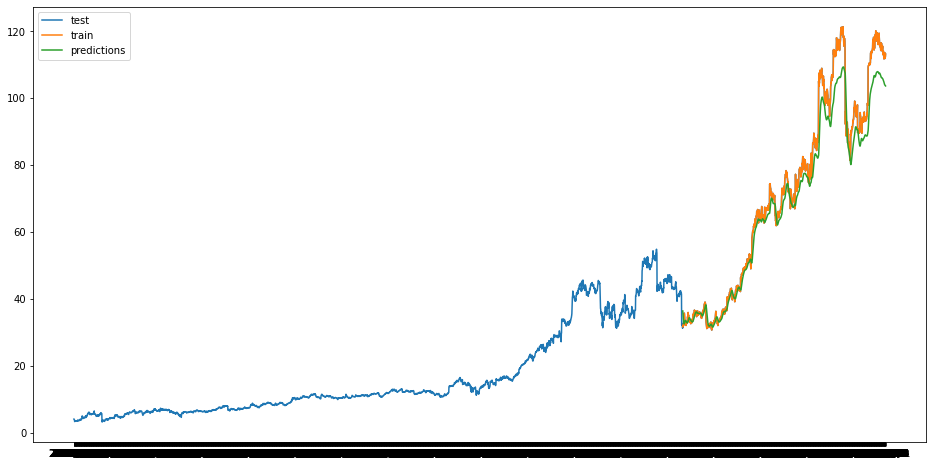

In [22]:
test= data[training_len:]
train= data[:training_len]
test['predictions']=predictions
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.plot(test[['Close','predictions']])
plt.legend(['test','train','predictions'])

In [23]:
new_df= df[['Close']]

In [24]:
last_60= new_df[-60:].values

In [26]:
last_60scaled= scaling.transform(last_60)

In [28]:
x_test=[]
x_test.append(last_60scaled)
x_test= np.array(x_test)
x_test= np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [30]:
pred= model.predict(x_test)
pred= scaling.inverse_transform(pred)
print(pred)

[[103.63674]]
